In [1]:
import plotly.offline as py
py.init_notebook_mode()
from eoshub import EOSHub
import batch_test_latent_sim as bt
import plotting_routines as pr

{'water_linear': '/Users/afq/Google Drive/networks/', 'water_iapws_rh_lg': '/Users/afq/Research/eoshub/networks/', 'water_iapws_lg': '/Users/afq/Google Drive/networks/', 'water_slgc': '/Users/afq/Google Drive/networks/', 'water_iapws_slgc_logp': '/Users/afq/Research/eoshub/networks/'}


In [2]:
EOSHub.eoses

['water_linear',
 'water_iapws_rh_lg',
 'water_iapws_lg',
 'water_slgc',
 'water_iapws_rh_lg',
 'water_iapws_slgc_logp']

In [3]:
problem_name = 'Transition_L2G_Drain'
eos = 'water_iapws_slgc_logp'
network = 'Classifying_pT_0.0_2,6,24,48,sigmoid,0.05'

In [4]:
ls = EOSHub.LatentSim('water_iapws_slgc_logp')

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
Detected out of order event.step likely caused by a TensorFlow restart. Purging expired events from Tensorboard display between the previous step: -1 (timestamp: -1) and current step: 0 (timestamp: 1562731690.6787279). Removing 2 scalars, 0 histograms, 0 compressed histograms, 0 images, and 0 audio.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest

In [5]:
bt.find_eos_test_cfg('water_slgc')

{'scale_file': 'data_files/water_iapws_logp_ranges.csv',
 'logp': True,
 'problem_list': dict_keys(['Cycle_sgclg', 'Hot_Gas', 'Hot_Gas_Fill', 'Linear_Liquid', 'Linear_Liquid_Heat', 'Liquid_Drain', 'Small_Gas', 'Small_Liquid', 'Transition_L2G', 'Transition_L2G_Drain'])}

In [6]:
#times = bt.solve_a_problem_arch('Transition_L2G_Drain','water_iapws_slgc_logp',
#                        'Classifying_pT_0.0_2,6,24,48,sigmoid,0.05')

In [7]:
problem = bt.all_test_problems[problem_name]
ls = EOSHub.LatentSim(eos,network)
ls.set_params(**problem.params)
q0 = ls.find_point(**problem.initial)

Singular Matrix Error during initialization
Singular Matrix Error during initialization


In [8]:
q0

array([[-0.2164595 ,  0.52017362]])

In [22]:
ls.set_params(Dt=1.0)

In [47]:
time_series = ls.integrate(1.0e4*10, q0,
                          schedule=problem.schedule,verbose=True, under_relax=1.0)

1.0 4 1.6642444747241338e-09
2.0 20 7.024943725057601e-09
3.0 2 6.8455205285194495e-09
4.0 2 5.339969448729413e-09
5.0 2 4.2300612241543755e-09
6.0 2 3.3964626486267893e-09
7.0 2 2.7600162827140728e-09
8.0 2 2.266957635148292e-09
9.0 2 1.879961930073854e-09
10.0 2 1.5726199827178128e-09
11.0 2 1.3259305993518152e-09
12.0 2 1.1259971746861927e-09
13.0 2 9.625222766753482e-10
14.0 2 8.27766489880459e-10
15.0 2 7.158597591958382e-10
16.0 2 6.222818444010056e-10
17.0 2 5.435317414602338e-10
18.0 2 4.768651429140251e-10
19.0 2 4.201159649572666e-10
20.0 2 3.715609195165608e-10
21.0 2 3.298158185127739e-10
22.0 2 2.937619166522763e-10
23.0 2 2.6249336460511684e-10
24.0 2 2.352627561210767e-10
25.0 2 2.1146172717085026e-10
26.0 2 1.905819330470943e-10
27.0 2 1.72206516905038e-10
28.0 2 1.5597836006348818e-10
29.0 2 1.4160740040941763e-10
30.0 2 1.2884502374334772e-10
31.0 2 1.1747616687405385e-10
32.0 2 1.0732362241868169e-10
33.0 2 9.823680432691449e-11
34.0 2 9.008034007558823e-11
35.0 2 8.

In [48]:
q = time_series[-1:,1:3]

In [49]:
q, ls.decode(q)

(array([[ 0.4311326 , -0.58884082]]),
 array([[ 2.95060805e+02,  5.81443974e+02, -2.64435006e+00,
         -8.50386807e+05]]))

In [50]:
ls.solve_a_time_step(q, verbose=True, under_relax = 1.0)

0 [[ 0.4311326  -0.58884082]] [[ 2.95060805e+02  5.81443974e+02 -2.64435006e+00 -8.50386807e+05]] 0.006805884585944387
1 [[ 0.43006551 -0.59556253]] [[ 2.93573678e+02  4.71114293e+02 -2.71642969e+00 -8.67302082e+05]] 0.00566456704539963
2 [[ 0.42893956 -0.60111406]] [[ 2.92155299e+02  3.96255427e+02 -2.73069534e+00 -8.73661391e+05]] 0.6429328144485178
3 [[0.56144989 0.02801519]] [[6.10620016e+02 1.44342445e+07 1.89360789e+02 3.84743497e+08]] 0.2068960792351991
4 [[ 0.59295388 -0.17646827]] [[5.45290638e+02 4.31159283e+06 2.29361797e+01 6.05945689e+07]] 0.0791215303671226
5 [[ 0.57441197 -0.2533865 ]] [[5.00704181e+02 1.33959877e+06 4.10160527e+00 1.68328455e+07]] 0.11805832445911035
6 [[ 0.49742509 -0.34288951]] [[4.06022686e+02 2.73786873e+05 1.13015121e+01 1.15354319e+07]] 0.10706275886058586
7 [[ 0.46888949 -0.4460794 ]] [[3.50740616e+02 2.68355007e+04 2.66959303e+00 4.89890235e+06]] 0.15696749700475035
8 [[ 0.42199214 -0.59587738]] [[ 2.86340859e+02  5.07514190e+02 -1.83169955e+00 

(array([[nan, nan]]), 499, nan)

In [51]:
time_series[-1,:]

array([ 9.74800000e+03,  4.31132603e-01, -5.88840818e-01,  2.95060805e+02,
        5.81443974e+02, -2.64435006e+00, -8.50386807e+05])

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
       |         [ (2,2) x3,y3 ]
       |         [ (3,2) x4,y4 ]
       |         [ (4,2) x5,y5 ]



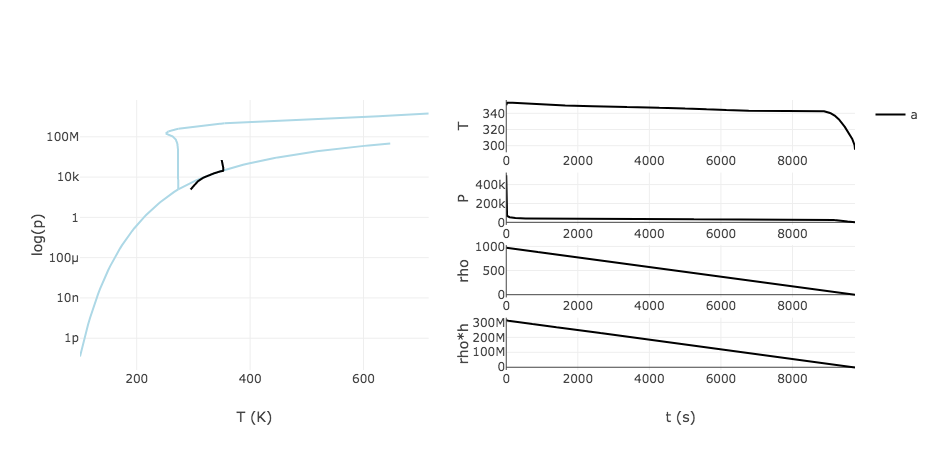

In [52]:
fig = pr.plotly_simulations_Tp_ts({"a":time_series})
py.iplot(fig)